In [26]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold # import KFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
df = pd.read_csv("RTA Dataset.csv")

In [28]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

In [29]:
# dropping columns that can cause imbalance while imputation
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [30]:
df.shape

(12316, 19)

In [31]:
# fill missing values with mean column values
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [32]:
df.isnull().sum()

Age_band_of_driver             0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


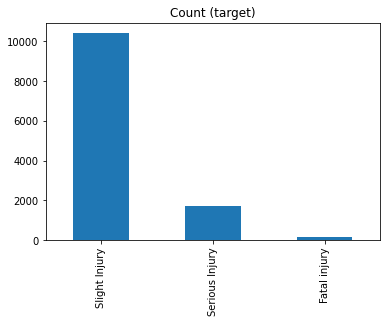

In [33]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [34]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)                            #categorical values to integers

In [35]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

In [36]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(8621, 18) (3695, 18) (8621,) (3695,)


In [37]:
xtrain.head()

,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident
4759,1,0,0,7,4,5,1,0,3,2,2,1,0,1,2,1,5,0
5676,1,4,14,7,2,5,1,0,3,2,8,1,0,2,0,0,5,16
353,4,0,7,7,2,5,0,0,0,2,2,1,0,2,0,0,5,3
6223,1,2,9,7,4,5,7,0,0,2,8,1,0,2,0,0,5,1
456,3,1,0,2,2,5,0,3,3,2,2,3,5,2,0,1,5,12


In [38]:
# upsampling using smote

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)


Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 18) (21972,)


In [39]:
ytrain.head()

0    2
1    1
2    1
3    2
4    1
Name: Accident_severity, dtype: int32

In [40]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

In [68]:
clf = RandomForestClassifier(criterion = "gini", max_depth = 32, min_samples_split = 10, random_state = 42)

In [69]:
clf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=32, min_samples_split=10, random_state=42)

In [70]:
clf.feature_importances_

array([0.07000985, 0.0634714 , 0.0801076 , 0.0718721 , 0.0651205 ,
       0.02471927, 0.06050879, 0.04405914, 0.07913241, 0.02523424,
       0.04693692, 0.06944323, 0.05554691, 0.04656804, 0.03490718,
       0.05067063, 0.01430039, 0.09739141])

In [71]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [72]:
ypred = clf.predict(xtest)

In [73]:
ypred

array([2, 2, 1, ..., 2, 2, 2])

In [74]:
confusion_matrix(ytest, ypred)

array([[   2,   10,   40],
       [   4,  119,  429],
       [  19,  405, 2667]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(ytest, ypred)

0.754533152909337

In [77]:
x.head()

,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident
0,0,0,0,9,2,5,1,0,3,2,3,1,1,2,3,5,5,9
1,1,3,11,6,4,5,1,0,3,2,8,1,1,2,3,5,5,16
2,0,0,5,1,6,5,1,0,3,2,2,1,1,2,0,1,5,0
3,0,2,11,6,6,6,7,0,0,2,8,1,1,2,2,0,5,1
4,0,1,0,4,6,5,7,0,0,2,8,1,1,2,3,5,5,16


In [78]:
xtrain.head()

,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident
0,1,0,0,7,4,5,1,0,3,2,2,1,0,1,2,1,5,0
1,1,4,14,7,2,5,1,0,3,2,8,1,0,2,0,0,5,16
2,4,0,7,7,2,5,0,0,0,2,2,1,0,2,0,0,5,3
3,1,2,9,7,4,5,7,0,0,2,8,1,0,2,0,0,5,1
4,3,1,0,2,2,5,0,3,3,2,2,3,5,2,0,1,5,12


Saving the trained model

In [79]:
import pickle

In [80]:
filename = 'trained_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [81]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [83]:
input_data = (1, 0, 0, 7, 4, 5, 1, 0, 3, 2, 2, 1, 0, 1, 2, 1, 5, 0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[2]


In [82]:
ytrain.head(30)

0     2
1     1
2     1
3     2
4     1
5     2
6     2
7     2
8     2
9     2
10    2
11    0
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    1
24    2
25    2
26    2
27    2
28    2
29    2
Name: Accident_severity, dtype: int32